In [4]:
import scipy
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import os
from scipy.io import loadmat, savemat
from matplotlib.colors import LogNorm
import time

In [5]:
filepath = '/Volumes/Untitled/GLDdata/2015/'

In [6]:
all2015Files = os.listdir(filepath)

In [10]:
def PeakCurrentData(filepath):
    firstFile = loadmat(filepath + all2015Files[0]).get("flashes")
    concat= firstFile[:,4]
    for fileName in all2015Files[1:]:
        mat_contents=loadmat(filepath+fileName, variable_names=['flashes']).get("flashes")
        concat = np.concatenate((concat,mat_contents[:,4]))
    np.save("all2015Data", concat)

In [5]:
# filepath = '/Volumes/lairdata/lightningdata/GLD_cleaned/2016-01-02/GLD-201601020000-cleaned.mat'
# mat = loadmat(filepath).get("flashes")
peak_current = np.load('all2015Data.npy')

In [55]:
def plot1DHist(peak_current):
    fig, ax = plt.subplots(figsize =(10, 8), tight_layout = True)
    ax.grid(color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    ax.set_yscale('log')
    #colors = ['aqua', 'red', 'gold', 'royalblue', 'darkorange', 'green', 'purple', 'cyan', 'yellow', 'lime']
    #cnts, values, bars = ax.hist(peak_current, bins = 20)
    plt.axvline(np.median(peak_current), color='k', linestyle='dashed', linewidth=1, label = "Median Peak Current [kA]")
    
    # This is  the colormap I'd like to use.
    cm = plt.cm.plasma
    # Get the histogramp
    Y,X = np.histogram(peak_current, 50)
    x_span = X.max()-X.min()
    C = [cm(((x-X.min())/x_span)) for x in X]
    
    plt.style.use('seaborn-dark')
    plt.bar(X[:-1],Y,color=C,width=X[1]-X[0])
    plt.xlabel("Peak Current [kA]", fontsize = 20, color="black")
    plt.ylabel("Frequency", fontsize = 20, color="black")
    plt.title("Frequency of Peak Currents 2015", fontsize = 20, color="black")
    plt.legend()
    
    #plt.savefig('./2DHistogramData/winterPlots.png') # saving plot
    plt.show();

In [47]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


KeyboardInterrupt: 

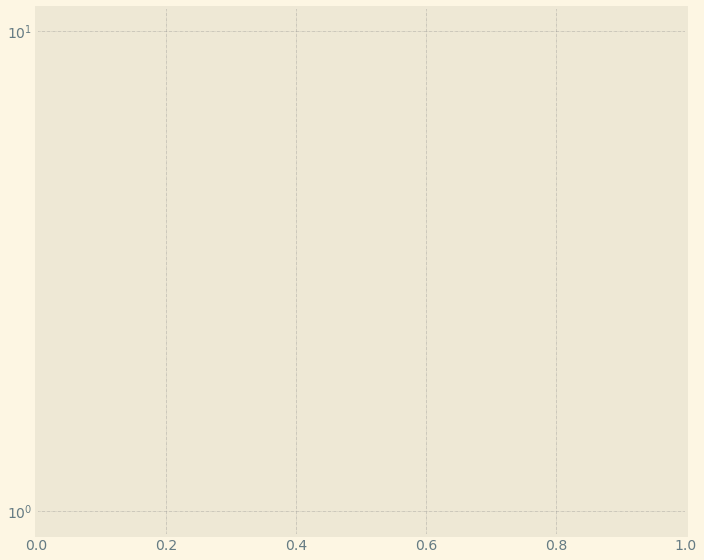

In [56]:
plot1DHist(peak_current)

In [14]:
# # + operator to join 1d list
# start = time.time()
# test1 = []

# for i in range(40):
#     arr1 = np.array([i for i in range(10000000)])
#     arr1 = arr1.tolist()
#     test1 += arr1
# end = time.time()
# print(end-start)

# # numpy concat 1d array
# start = time.time()
# t2 = np.array([1,2,3,4])
# a = np.array([i for i in range(10000000)])
# for i in range(40):
#     t2 = np.concatenate([t2,a])
# end = time.time()
# print(end-start)


In [9]:
# # + operator to join 2d list
# start = time.time()
# test4 = [[1,2,3,4]]
# for i in range(40):
#     arr4 = np.array([[1,2,3,4] for i in range(10000000)])
#     arr4 = arr4.tolist()
#     test4 += arr4
# end = time.time()
# print(end-start)

# # numpy concat 2d array
# start = time.time()
# t3 = np.array([[1,2,3,4]])
# arr = np.array([[1,2,3,4] for i in range(10000000)])
# for i in range(40):
#     t3 = np.concatenate([t3,arr])
# end = time.time()
# print(end-start)

In [3]:
# # numpy concat 2d array
# start = time.time()
# t3 = np.array([[1,2,3,4]])
# for i in range(40):
#     arr = np.array([[1,2,3,4] for i in range(100000)])
#     t3 = np.concatenate([t3,arr])
# end = time.time()
# print(end-start)

6.973003149032593
5.721013069152832


In [ ]:
# start = time.time()
# t5 = np.array([1,2])
# for i in range(40):
#     arr = np.array([[1,2,3,4] for i in range(100000)])
#     t5 = np.concatenate([t5,arr[:,3]])
# end = time.time()
# print(end-start)